#Load the data

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/drive/MyDrive/data set(ms)/indian-ev-data.csv')

In [2]:
data.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


#Data preprocessing

In [3]:
# Check for missing values
data.isnull().sum()

,0
id,0
Model,0
Manufacturer,0
Vehicle Type,0
Battery Capacity (kWh),0
Range per Charge (km),0
Charging Time,1
Price,1
Power (HP or kW),1
Top Speed (km/h),1


In [4]:
# Fill or drop missing values
data.fillna(method='ffill', inplace=True)

<ipython-input-4-4b13f8b096df>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [5]:
# Remove duplicates if necessary
data.drop_duplicates(inplace=True)

In [6]:
# Data types inspection
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      50 non-null     int64  
 1   Model                   50 non-null     object 
 2   Manufacturer            50 non-null     object 
 3   Vehicle Type            50 non-null     object 
 4   Battery Capacity (kWh)  50 non-null     float64
 5   Range per Charge (km)   50 non-null     int64  
 6   Charging Time           50 non-null     float64
 7   Price                   50 non-null     float64
 8   Power (HP or kW)        50 non-null     float64
 9   Top Speed (km/h)        50 non-null     float64
 10  Year of Manufacture     50 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.4+ KB


In [7]:
# Fill or drop missing values
data.fillna(method='ffill', inplace=True)

<ipython-input-7-4b13f8b096df>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [8]:
# Check summary statistics
print(data.describe())

             id  Battery Capacity (kWh)  Range per Charge (km)  Charging Time  \
count  50.00000               50.000000              50.000000        50.0000   
mean   25.50000                3.188000             120.160000         3.7300   
std    14.57738                0.950325              30.370743         0.9541   
min     1.00000                2.200000              75.000000         2.5000   
25%    13.25000                2.550000             100.000000         3.0000   
50%    25.50000                2.900000             118.000000         3.5000   
75%    37.75000                3.500000             140.000000         4.5000   
max    50.00000                6.200000             200.000000         6.0000   

               Price  Power (HP or kW)  Top Speed (km/h)  Year of Manufacture  
count      50.000000         50.000000         50.000000             50.00000  
mean   119560.000000          6.720000         73.600000           2021.22000  
std     46291.516391          

#Exploratary Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

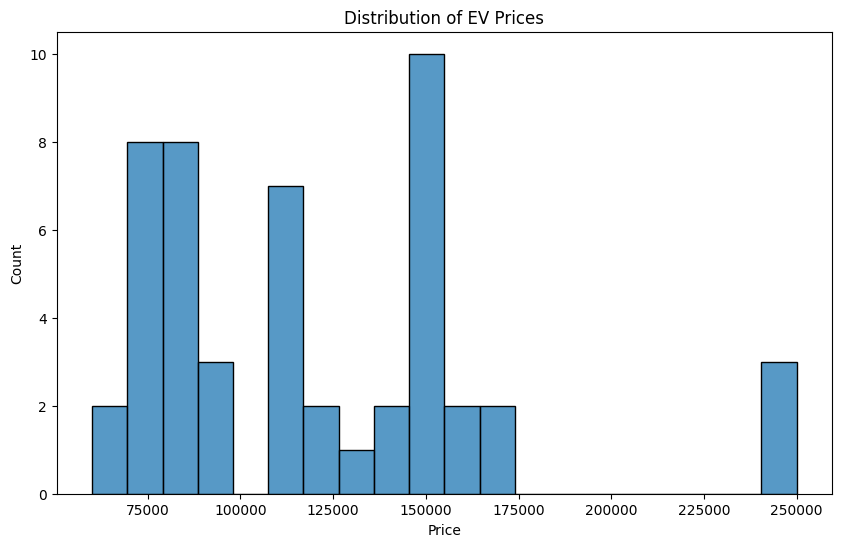

In [10]:
# Distribution of EV prices
plt.figure(figsize=(10,6))
sns.histplot(data['Price'], bins=20)
plt.title('Distribution of EV Prices')
plt.show()

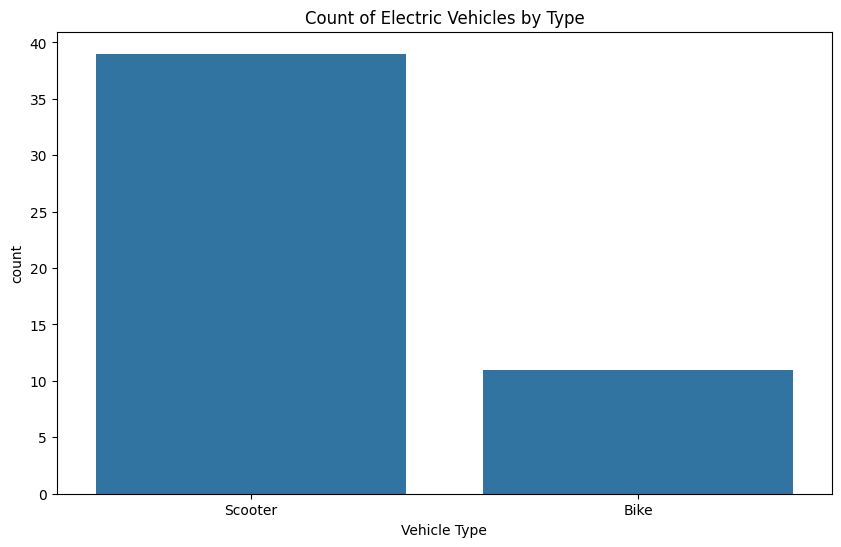

In [11]:
# EV count by type
plt.figure(figsize=(10,6))
sns.countplot(x='Vehicle Type',data=data)
plt.title('Count of Electric Vehicles by Type')
plt.show()

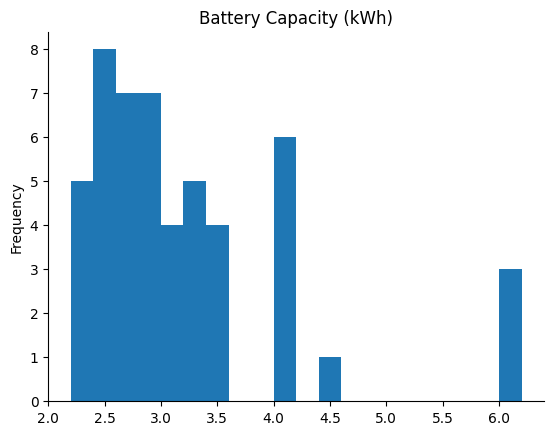

In [12]:
#Battery Capacity (kWh)
data['Battery Capacity (kWh)'].plot(kind='hist', bins=20, title='Battery Capacity (kWh)')
plt.gca().spines[['top', 'right',]].set_visible(False)

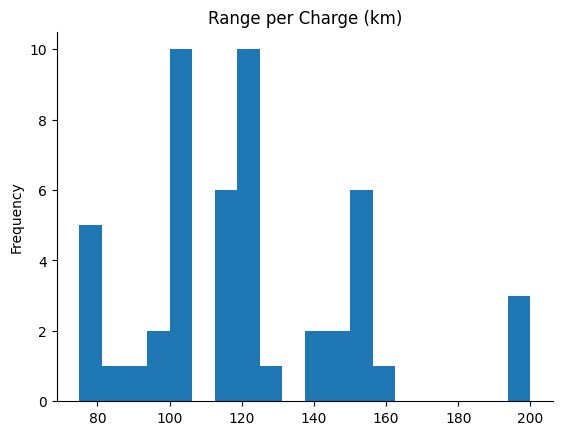

In [13]:
#Range per Charge (km)
data['Range per Charge (km)'].plot(kind='hist', bins=20, title='Range per Charge (km)')
plt.gca().spines[['top', 'right',]].set_visible(False)

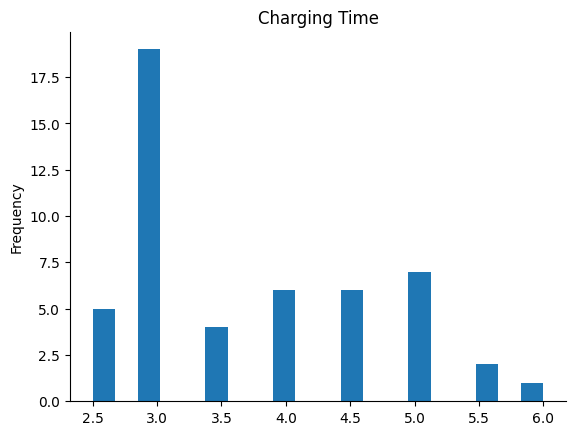

In [14]:
#Charging Time
data['Charging Time'].plot(kind='hist', bins=20, title='Charging Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

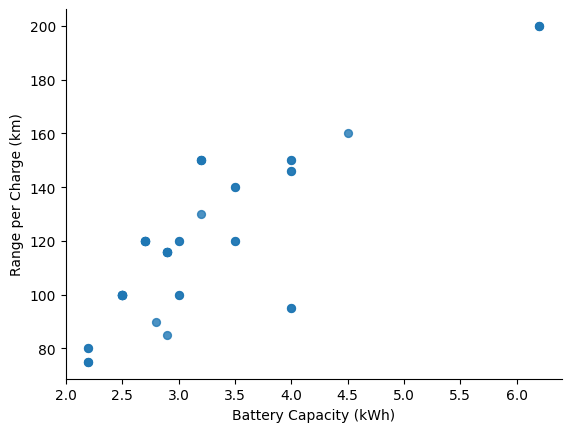

In [15]:
# Battery Capacity (kWh) vs Range per Charge (km)
data.plot(kind='scatter', x='Battery Capacity (kWh)', y='Range per Charge (km)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

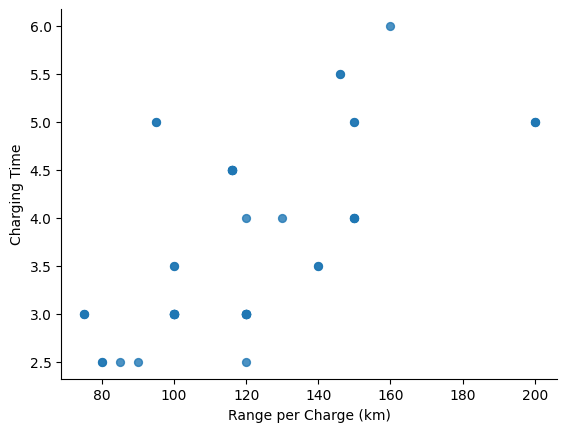

In [16]:
# Range per Charge (km) vs Charging Time
data.plot(kind='scatter', x='Range per Charge (km)', y='Charging Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

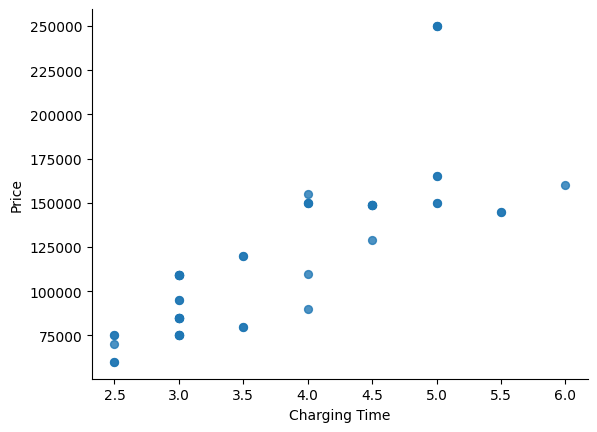

In [17]:
# Charging Time vs Price
data.plot(kind='scatter', x='Charging Time', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Extracting segments
K-means


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [19]:
# Selecting relevant numerical features for segmentation
numeric_columns = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']


In [20]:
# Convert selected columns to numeric, coercing errors to NaN
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [21]:
# Handle missing values (if any) by filling with the median
data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.median()))
print(data.isnull().sum())

id                        0
Model                     0
Manufacturer              0
Vehicle Type              0
Battery Capacity (kWh)    0
Range per Charge (km)     0
Charging Time             0
Price                     0
Power (HP or kW)          0
Top Speed (km/h)          0
Year of Manufacture       0
dtype: int64


In [22]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numeric_columns])


In [23]:
# Finding the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

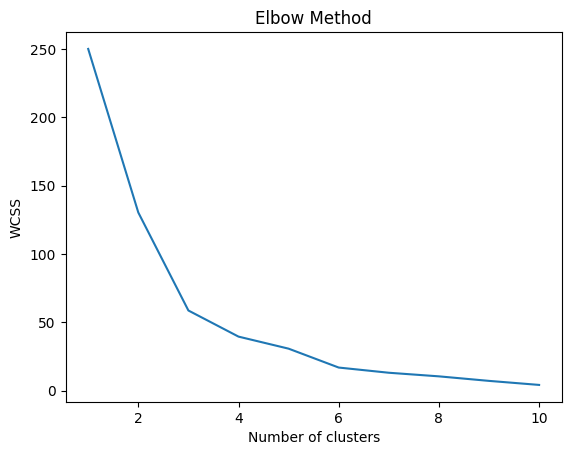

In [24]:
# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#profiling segments

In [25]:
# Fit k-means with chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Segment'] = kmeans.fit_predict(X_scaled)

# Profile each segment
segment_profile = data.groupby('Segment')[numeric_columns].mean()
print(segment_profile)

         Battery Capacity (kWh)  Range per Charge (km)          Price  \
Segment                                                                 
0                      6.200000             200.000000  250000.000000   
1                      3.212500             132.416667  135958.333333   
2                      2.769565              96.956522   85434.782609   

         Power (HP or kW)  Top Speed (km/h)  
Segment                                      
0               25.000000        100.000000  
1                7.875000         82.500000  
2                3.130435         60.869565  


#describing segments
Visualisation

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


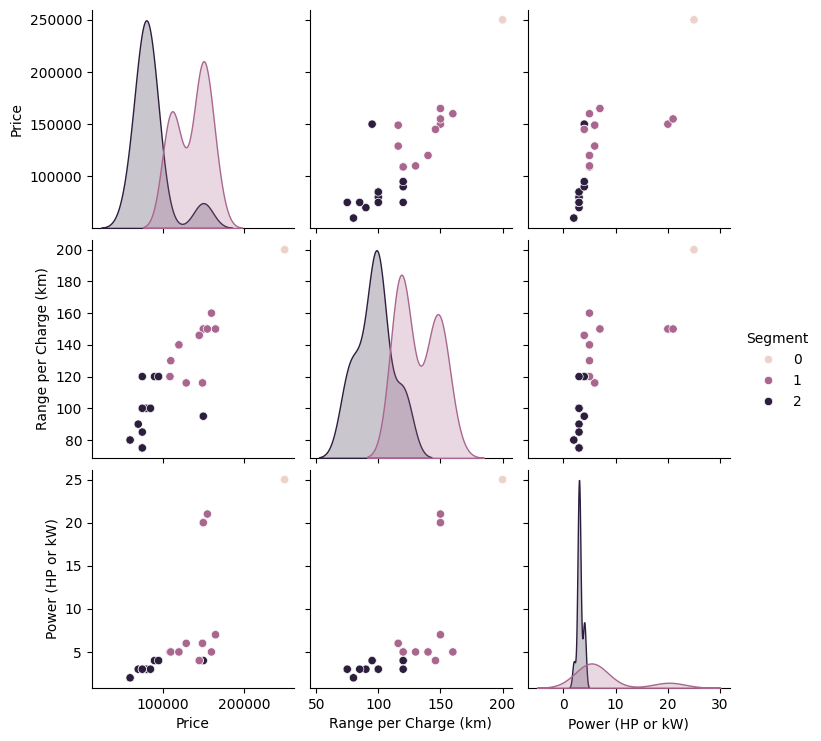

In [26]:
# Visualize segment distribution across important features
sns.pairplot(data, hue='Segment', vars=['Price', 'Range per Charge (km)', 'Power (HP or kW)'])
plt.show()


#Selecting the target segment

In [27]:
# Let's summarize key characteristics for each segment to aid in decision-making
segment_summary = data.groupby('Segment').agg({
    'Price': ['mean', 'min', 'max'],
    'Range per Charge (km)': ['mean', 'min', 'max'],
    'Battery Capacity (kWh)': ['mean', 'min', 'max'],
    'Power (HP or kW)': ['mean', 'min', 'max'],
    'Top Speed (km/h)': ['mean', 'min', 'max']
})

print(segment_summary)


                 Price                     Range per Charge (km)            \
                  mean       min       max                  mean  min  max   
Segment                                                                      
0        250000.000000  250000.0  250000.0            200.000000  200  200   
1        135958.333333  109000.0  165000.0            132.416667  116  160   
2         85434.782609   60000.0  150000.0             96.956522   75  120   

        Battery Capacity (kWh)           Power (HP or kW)              \
                          mean  min  max             mean   min   max   
Segment                                                                 
0                     6.200000  6.2  6.2        25.000000  25.0  25.0   
1                     3.212500  2.7  4.5         7.875000   4.0  21.0   
2                     2.769565  2.2  4.0         3.130435   2.0   4.0   

        Top Speed (km/h)                
                    mean    min    max  
Segment   

#marketing mix

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


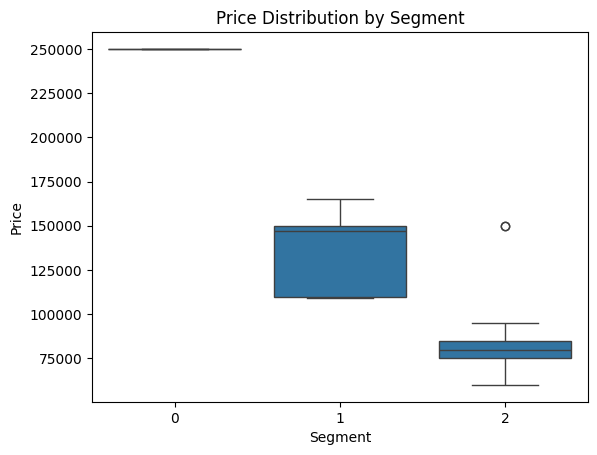

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


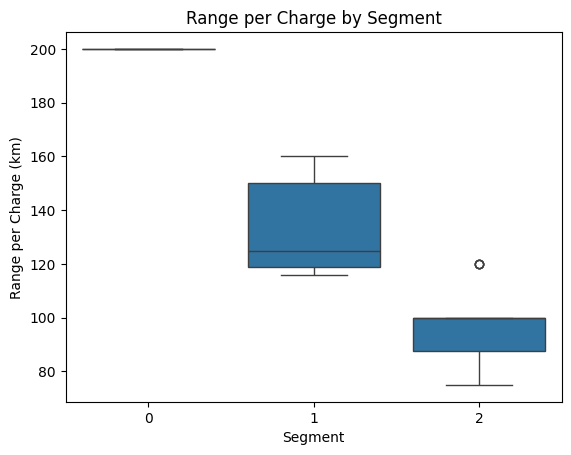

In [28]:
# Visualizing target segment characteristics
target_segment = 1  # Assume you choose segment 1; you can change this based on step 8 results
segment_data = data[data['Segment'] == target_segment]

# Visualizing product features that matter to the segment
sns.boxplot(x='Segment', y='Price', data=data)
plt.title('Price Distribution by Segment')
plt.show()

sns.boxplot(x='Segment', y='Range per Charge (km)', data=data)
plt.title('Range per Charge by Segment')
plt.show()

#evaluating

In [29]:
# mock data for illustration
performance_data = pd.DataFrame({
    'Segment': [0, 1, 2],
    'Sales Growth (%)': [5, 12, 3],
    'Customer Satisfaction (Rating out of 10)': [7.5, 8.2, 6.9]
})

# Evaluating segment performance
print(performance_data)

   Segment  Sales Growth (%)  Customer Satisfaction (Rating out of 10)
0        0                 5                                       7.5
1        1                12                                       8.2
2        2                 3                                       6.9


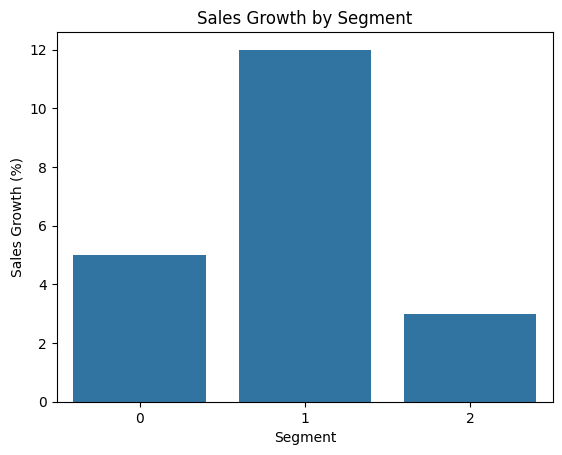

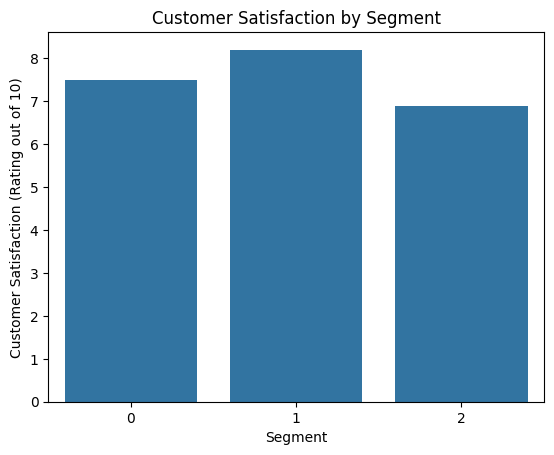

In [30]:
# Visualizing segment performance
sns.barplot(x='Segment', y='Sales Growth (%)', data=performance_data)
plt.title('Sales Growth by Segment')
plt.show()

sns.barplot(x='Segment', y='Customer Satisfaction (Rating out of 10)', data=performance_data)
plt.title('Customer Satisfaction by Segment')
plt.show()